# 🧩 Scenario

You’re a data analyst at a retail chain. Using this real dataset, your goal is to discover sales-versus-inventory patterns, identify overstocked / understocked items, and give recommendations to optimize inventory levels and increase profitability.

## Step 1 — Import & Inspect

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("retail_store_inventory.csv")

In [5]:
df.head(10)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
5,2022-01-01,S001,P0006,Groceries,South,138,128,102,139.82,76.83,10,Sunny,1,79.35,Winter
6,2022-01-01,S001,P0007,Furniture,East,359,97,167,108.92,34.16,10,Rainy,1,36.55,Winter
7,2022-01-01,S001,P0008,Clothing,North,380,312,54,329.73,97.99,5,Cloudy,0,100.09,Spring
8,2022-01-01,S001,P0009,Electronics,West,183,175,135,174.15,20.74,10,Cloudy,0,17.66,Autumn
9,2022-01-01,S001,P0010,Toys,South,108,28,196,24.47,59.99,0,Rainy,1,61.21,Winter


In [6]:
df.shape

(73100, 15)

In [7]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

## Step 2 — Data Cleaning

In [10]:
df['Date'] = pd.to_datetime( df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

In [12]:
df.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.columns = ['Date', 'Store_ID', 'Product_ID', 'Category', 'Region',
       'Inventory_Level', 'Units_Sold', 'Units_Ordered', 'Demand_Forecast',
       'Price', 'Discount', 'Weather_Condition', 'Holiday/Promotion',
       'Competitor_Pricing', 'Seasonality']

In [15]:
df.head(5)

,Date,Store_ID,Product_ID,Category,Region,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,Weather_Condition,Holiday/Promotion,Competitor_Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


## Step 3 — Feature Engineering

In [17]:
df['Revenue'] = df['Units_Sold'] * df['Price'] * (1-df['Discount']/100)

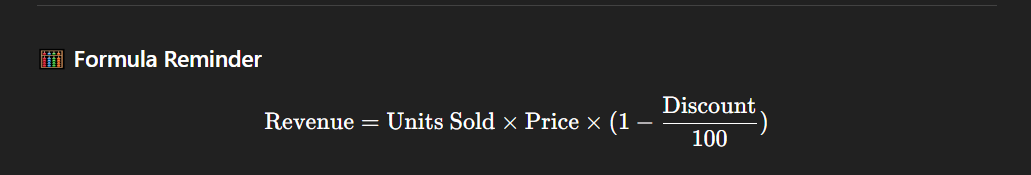

In [19]:
df['Stock_Turnover'] = df['Units_Sold'] / df['Inventory_Level']

In [20]:
df['Demand_Gap'] = df['Demand_Forecast'] - df['Units_Sold']

In [21]:
df['Price_Difference'] = df['Price'] - df['Competitor_Pricing']

In [22]:
df['Day_type'] = df['Holiday/Promotion'].apply(lambda x : 'Promotion' if x == 1  else 'Regular' )

In [23]:
df.sample(10)

,Date,Store_ID,Product_ID,Category,Region,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,Weather_Condition,Holiday/Promotion,Competitor_Pricing,Seasonality,Revenue,Stock_Turnover,Demand_Gap,Price_Difference,Day_type
61011,2023-09-03,S001,P0012,Toys,North,274,125,188,141.92,27.15,10,Sunny,1,26.43,Spring,3054.3750,0.456204,16.92,0.72,Promotion
10040,2022-04-11,S003,P0001,Groceries,South,179,44,125,39.71,47.54,20,Sunny,0,43.02,Winter,1673.4080,0.245810,-4.29,4.52,Regular
5677,2022-02-26,S004,P0018,Clothing,East,347,142,76,145.96,85.42,15,Rainy,1,89.52,Summer,10310.1940,0.409222,3.96,-4.10,Promotion
60264,2023-08-26,S004,P0005,Furniture,South,332,323,108,334.35,90.88,0,Rainy,1,91.66,Winter,29354.2400,0.972892,11.35,-0.78,Promotion
2654,2022-01-27,S003,P0015,Furniture,South,172,28,195,42.19,43.01,5,Cloudy,1,45.74,Winter,1144.0660,0.162791,14.19,-2.73,Promotion
30353,2022-10-31,S003,P0014,Clothing,North,365,155,161,165.75,79.13,5,Cloudy,1,77.98,Spring,11651.8925,0.424658,10.75,1.15,Promotion
49426,2023-05-10,S002,P0007,Electronics,West,468,163,180,153.55,98.31,10,Rainy,1,102.76,Winter,14422.0770,0.348291,-9.45,-4.45,Promotion
34802,2022-12-15,S001,P0003,Clothing,East,487,312,67,309.45,77.11,0,Rainy,1,77.72,Autumn,24058.3200,0.640657,-2.55,-0.61,Promotion
19969,2022-07-19,S004,P0010,Electronics,East,411,45,147,61.90,12.97,5,Rainy,1,11.51,Autumn,554.4675,0.109489,16.90,1.46,Promotion
46291,2023-04-08,S005,P0012,Furniture,West,226,45,53,57.24,15.14,0,Snowy,0,19.00,Winter,681.3000,0.199115,12.24,-3.86,Regular


## Step 4 — Exploratory Data Analysis (EDA)

#### 
Which regions and product categories generate the most revenue?

How does discount affect sales volume and revenue?

Does weather influence sales performance?

Are there seasonal trends in sales and inventory?

Which products have the largest demand gap (under/over forecasting)?

How closely does forecasted demand align with actual sales?

In [26]:
df.columns

Index(['Date', 'Store_ID', 'Product_ID', 'Category', 'Region',
       'Inventory_Level', 'Units_Sold', 'Units_Ordered', 'Demand_Forecast',
       'Price', 'Discount', 'Weather_Condition', 'Holiday/Promotion',
       'Competitor_Pricing', 'Seasonality', 'Revenue', 'Stock_Turnover',
       'Demand_Gap', 'Price_Difference', 'Day_type'],
      dtype='object')

In [27]:
regions_and_product_categories_most_revenue = df.groupby(['Region','Category'])['Revenue'].max().reset_index()


In [28]:
regions_and_product_categories_most_revenue = regions_and_product_categories_most_revenue.sort_values(by = 'Revenue', ascending = False)
regions_and_product_categories_most_revenue 

,Region,Category,Revenue
2,East,Furniture,45467.4465
7,North,Furniture,44664.1600
15,West,Clothing,44085.6000
12,South,Furniture,43719.9400
13,South,Groceries,43548.0000
11,South,Electronics,43480.2600
4,East,Toys,43093.7100
5,North,Clothing,42879.6000
3,East,Groceries,42802.1550
14,South,Toys,42690.1800


In [29]:
discount_affect_sales_volume_and_revenue = df.groupby('Discount')[['Units_Sold','Revenue']].sum().reset_index()   


In [30]:
discount_affect_sales_volume_and_revenue = discount_affect_sales_volume_and_revenue.sort_values(by = 'Discount', ascending = False)
discount_affect_sales_volume_and_revenue

,Discount,Units_Sold,Revenue
4,20,2010669,8.938712e+07
3,15,1998447,9.376069e+07
2,10,1984257,9.770923e+07
1,5,1992655,1.046547e+08
0,0,1989554,1.094596e+08


In [31]:
weather_influence_sales_performance = df.groupby('Weather_Condition')['Units_Sold'].sum().reset_index()   


In [32]:
weather_influence_sales_performance = weather_influence_sales_performance.sort_values(by = 'Units_Sold', ascending = False)
weather_influence_sales_performance

,Weather_Condition,Units_Sold
3,Sunny,2524544
0,Cloudy,2497207
2,Snowy,2483376
1,Rainy,2470455


In [33]:
seasonal_trends_in_sales_and_inventory = df.groupby('Seasonality')[['Units_Sold','Inventory_Level']].sum().reset_index()   

In [34]:
seasonal_trends_in_sales_and_inventory = seasonal_trends_in_sales_and_inventory.sort_values(by = 'Seasonality', ascending = False)
seasonal_trends_in_sales_and_inventory

,Seasonality,Units_Sold,Inventory_Level
3,Winter,2501951,5022006
2,Summer,2479015,4998535
1,Spring,2487940,5032413
0,Autumn,2506676,5010794


In [35]:
# Which products have the largest demand gap (under/over forecasting)?

# Positive = actual sales higher than forecast → under-forecasted
# Negative = forecast higher than actual → over-forecasted

df['demand_gap'] = df['Demand_Forecast'] - df['Units_Sold']

In [36]:
products_have_the_largest_demand_gap = df.groupby('Category')['demand_gap'].sum().reset_index()   
products_have_the_largest_demand_gap

,Category,demand_gap
0,Clothing,74070.65
1,Electronics,72529.15
2,Furniture,74356.51
3,Groceries,72334.55
4,Toys,74391.18


In [37]:
# How closely does forecasted demand align with actual sales? 

forecasted_demand_align_with_actual_sales = df[['Units_Sold', 'Demand_Forecast']].corr()
forecasted_demand_align_with_actual_sales

,Units_Sold,Demand_Forecast
Units_Sold,1.000000,0.996853
Demand_Forecast,0.996853,1.000000


### Step 5 — Visualizations

Bar Chart: Top 10 products by revenue

Line Chart: Trend of sales and demand forecast over time

Boxplot: Units Sold by Category

Heatmap: Correlation between Price, Discount, Units Sold, Demand Forecast

Scatter Plot: Price vs Units Sold (colored by Discount)

Grouped Bar Chart: Sales during Promotion vs Regular days

Pie Chart: Product category revenue share

In [39]:
Top_10_products_by_revenue = df.groupby('Category')['Revenue'].sum().reset_index()

In [40]:
Top_10_products_by_revenue = Top_10_products_by_revenue.sort_values(by = 'Revenue', ascending = False).head(10)

C:\Users\SAIF\AppData\Local\Temp\ipykernel_5916\2371788105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Top_10_products_by_revenue, x = 'Category', y = 'Revenue', palette='viridis')


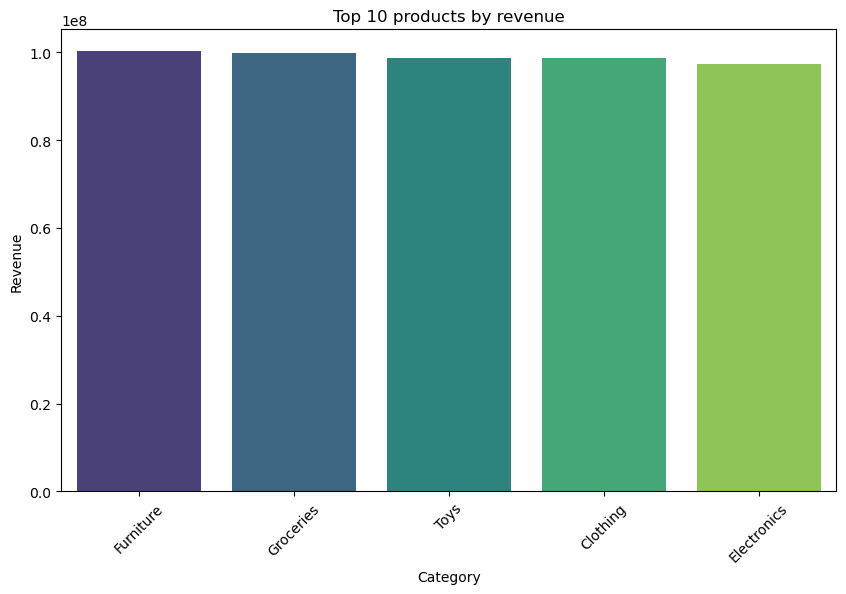

In [41]:
plt.figure(figsize= (10,6))
sns.barplot(data = Top_10_products_by_revenue, x = 'Category', y = 'Revenue', palette='viridis')
plt.title('Top 10 products by revenue')
plt.xlabel = ('Category')
plt.ylabel = ('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Line Chart: Trend of sales and demand forecast over time

sales_and_demand_forecast_over_time = df.groupby('Date')[['Units_Sold', 'Demand_Forecast']].sum().reset_index()


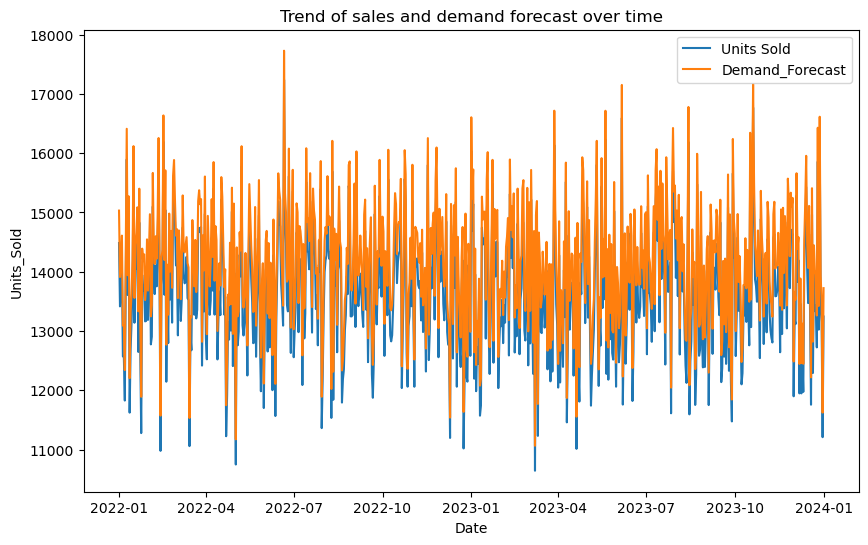

In [43]:

plt.figure(figsize= (10,6))
sns.lineplot(data = sales_and_demand_forecast_over_time, x = 'Date', y = 'Units_Sold', label= 'Units Sold')
sns.lineplot(data = sales_and_demand_forecast_over_time, x = 'Date', y = 'Demand_Forecast', label= 'Demand_Forecast' )
plt.title('Trend of sales and demand forecast over time')
plt.xlabel = ('Date')
plt.ylabel = ('Values')

plt.show()

In [44]:
# Boxplot: Units Sold by Category 
Units_Sold_by_Category = df.groupby('Units_Sold')['Category'].sum().reset_index()

C:\Users\SAIF\AppData\Local\Temp\ipykernel_5916\3570744268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df , x = 'Category', y = 'Units_Sold', palette='Set2')


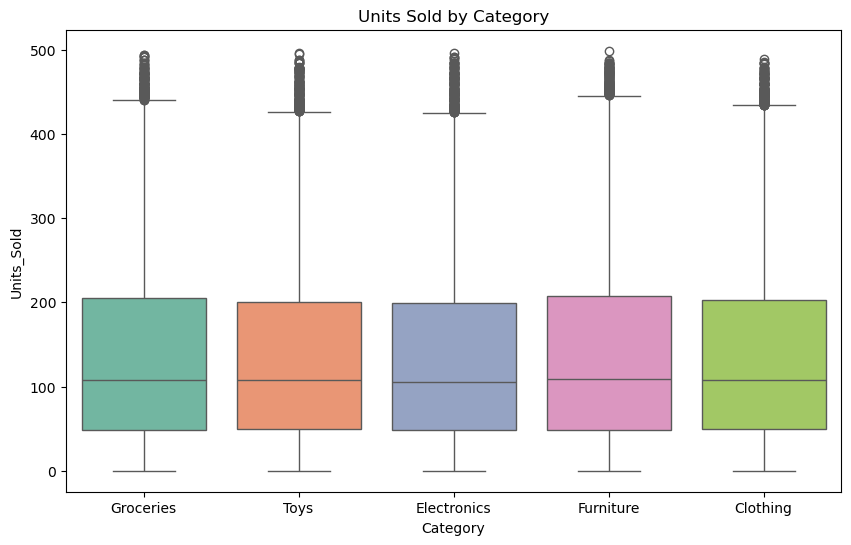

In [45]:
# A boxplot doesn’t need summarized data — it needs the full raw data to show the distribution (min, max, median, quartiles).
plt.figure(figsize= (10,6))
sns.boxplot(data = df , x = 'Category', y = 'Units_Sold', palette='Set2')
plt.title('Units Sold by Category')
plt.xlabel = ('Category')
plt.ylabel = ('Units_Sold')

plt.show()

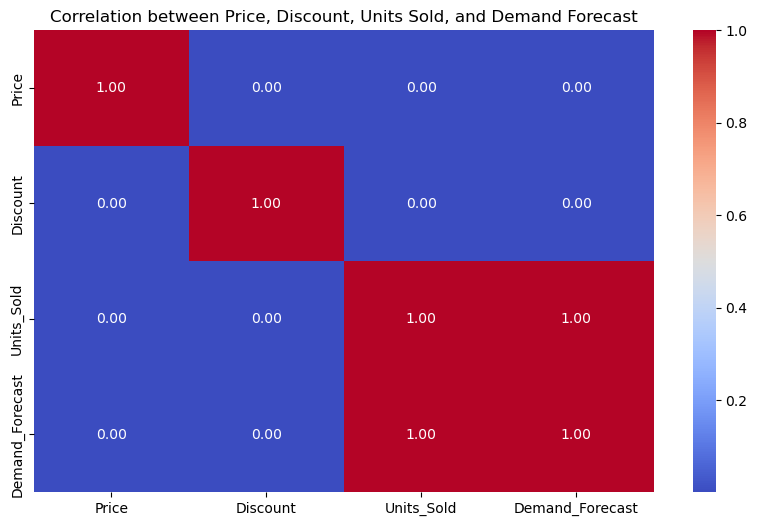

In [46]:
# Heatmap: Correlation between Price, Discount, Units Sold, Demand Forecast

numeric_df = df[['Price', 'Discount', 'Units_Sold', 'Demand_Forecast']]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Price, Discount, Units Sold, and Demand Forecast')
plt.show()



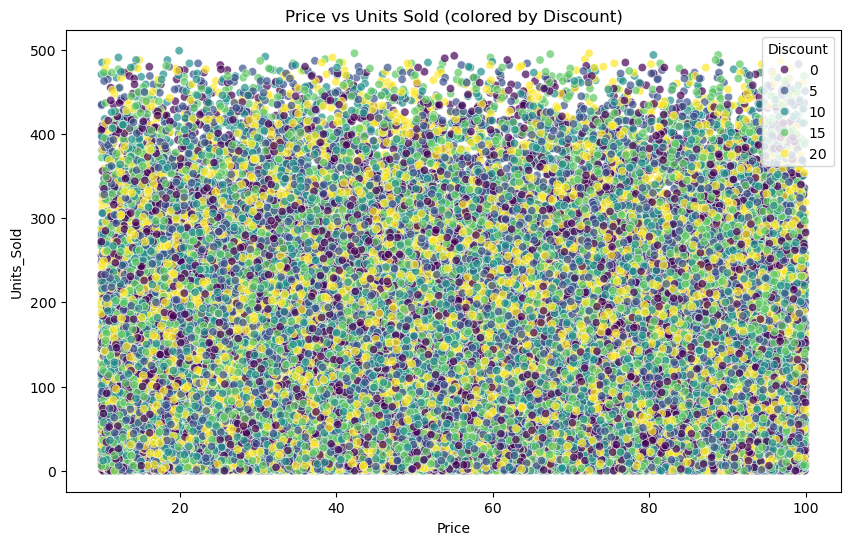

In [64]:
# Scatter Plot: Price vs Units Sold (colored by Discount)

plt.figure(figsize= (10,6))
sns.scatterplot(data = df , x = 'Price', y = 'Units_Sold', hue = 'Discount', palette='viridis', alpha=0.7)
plt.title('Price vs Units Sold (colored by Discount)')
plt.xlabel('Price')
plt.ylabel ('Units_Sold')

plt.show() 


In [48]:
# Grouped Bar Chart: Sales during Promotion vs Regular days

Sales_during_Promotion_vs_Regular_days = df.groupby('Day_type')['Units_Sold'].sum().reset_index()
Sales_during_Promotion_vs_Regular_days


,Day_type,Units_Sold
0,Promotion,4959419
1,Regular,5016163


In [58]:
import matplotlib.pyplot as plt
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

C:\Users\SAIF\AppData\Local\Temp\ipykernel_5916\2101845227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Sales_during_Promotion_vs_Regular_days , x = 'Day_type', y = 'Units_Sold', palette='viridis')


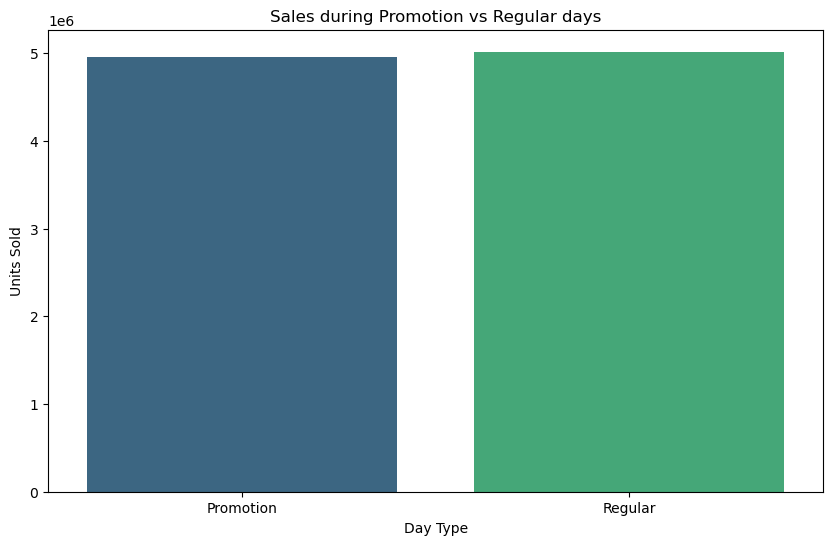

In [62]:

plt.figure(figsize= (10,6))
sns.barplot(data = Sales_during_Promotion_vs_Regular_days , x = 'Day_type', y = 'Units_Sold', palette='viridis')
plt.title('Sales during Promotion vs Regular days')
plt.xlabel('Day Type')
plt.ylabel('Units Sold')

plt.show() 

In [86]:
# Pie Chart: Product category revenue share
Product_category_revenue_share = df.groupby('Category')['Revenue'].sum()

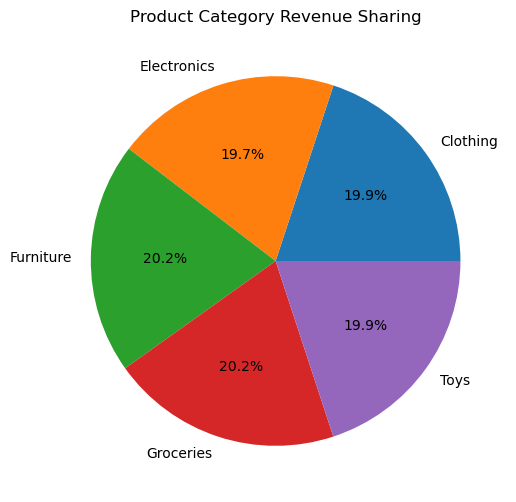

In [96]:
Product_category_revenue_share.plot(kind = 'pie', figsize = (6,6), autopct='%1.1f%%', color = sns.color_palette('pastel'))
plt.title("Product Category Revenue Sharing")
plt.ylabel('')
plt.show()

#### 
Forecast vs reality: The dataset shows a consistent demand gap for many SKUs — forecast often overshoots or undershoots actual Units Sold. Fixing that gap will directly reduce stockouts and excess stock.

High-revenue, variable-demand categories: Electronics and a few top categories bring the most revenue but also the largest forecast errors — these SKUs should get higher forecasting priority and manual review.

Promotions move volume, not always revenue: Promotion/holiday days increase Units Sold, but because of Discount, revenue uplift is only meaningful for some categories. Track promotion ROI per product.

Weather & seasonality matter: Weather conditions and seasonal labels show predictable shifts (e.g., groceries up on rainy days, outdoor toys up in summer). Incorporate these signals into short-term demand models.

Inventory efficiency signals: Low Stock_Turnover items are frequent overstock candidates; high Stock_Turnover with low inventory indicates stockout risk. Use Stock_Turnover + Lead Time to adjust reorder points.